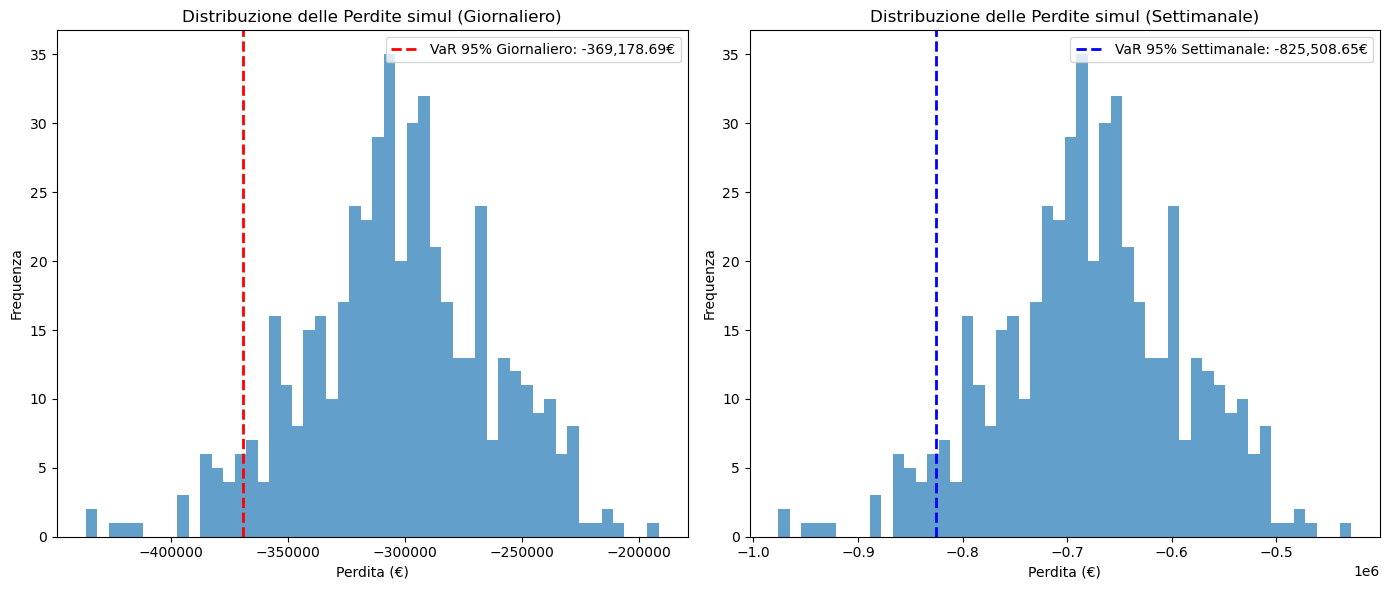

VaR al 95% per un giorno: -369,178.69€
VaR al 95% per una settimana: -825,508.65€


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parametri
val_az = 100000  
val_obbligaz = 100000
val_pass_assic = 200_000_000  
SD_az_annuo = 0.20  
media_az = 0.000  
gradi_di_liberta_az = 5  
SD_obbligaz_annuo = 0.05  
media_obbligaz = 0.0005  
lambda_poisson = 100  # media sinistri giornalieri
media_sinistro = 10000  # media del val del sinistro
SD_sinistro = 5000  # SD del val del sinistro

# parametri simulazione
num_simul = 1000
gg = 252

# calcolo SD gg
SD_az_gg = SD_az_annuo / np.sqrt(gg)
SD_obbligaz_gg = SD_obbligaz_annuo / np.sqrt(gg)

# simul Monte Carlo

return_az_simul = np.random.standard_t(gradi_di_liberta_az, size=num_simul) * SD_az_gg + media_az

return_obbligaz_simul = np.random.lognormal(mean=media_obbligaz, sigma=SD_obbligaz_gg, size=num_simul)

num_sinistri_simul = np.random.poisson(lambda_poisson, num_simul)
amm_sinistro_simul = np.random.lognormal(mean=np.log(media_sinistro), sigma=SD_sinistro, size=num_simul)
amm_sinistro_simul = np.minimum(amm_sinistro_simul, 100000)
pass_simul = num_sinistri_simul * amm_sinistro_simul

# calcolo delle PL simulate
PL_az = val_az * return_az_simul
PL_obbligaz = val_obbligaz * return_obbligaz_simul
pass_totale_simul = pass_simul * val_pass_assic / np.sum(pass_simul)

# risultato complessivo del portafoglio
PL_totali = PL_az + PL_obbligaz - pass_totale_simul

# solo le perdite
perdite_totali = PL_totali[PL_totali < 0]

# calcoli VaR al 95%
VaR_95_giorno = np.percentile(perdite_totali, 5)
VaR_95_settimana = VaR_95_giorno * np.sqrt(5)

# grafico delle perdite giornaliere e VaR
plt.figure(figsize=(14, 6))

# grafico: distribuzione perdite giornaliere
plt.subplot(1, 2, 1)
plt.hist(perdite_totali, bins=50, alpha=0.7)
plt.axvline(VaR_95_giorno, color='r', linestyle='dashed', linewidth=2, label=f'VaR 95% Giornaliero: {VaR_95_giorno:,.2f}€')
plt.legend()
plt.title('Distribuzione delle Perdite simul (Giornaliero)')
plt.xlabel('Perdita (€)')
plt.ylabel('Frequenza')

# grafico: distribuzione perdite settimanali e VAR
plt.subplot(1, 2, 2)
plt.hist(perdite_totali * np.sqrt(5), bins=50, alpha=0.7) 
plt.axvline(VaR_95_settimana, color='b', linestyle='dashed', linewidth=2, label=f'VaR 95% Settimanale: {VaR_95_settimana:,.2f}€')
plt.legend()
plt.title('Distribuzione delle Perdite simul (Settimanale)')
plt.xlabel('Perdita (€)')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

# valori VAR
print(f"VaR al 95% per un giorno: {VaR_95_giorno:,.2f}€")
print(f"VaR al 95% per una settimana: {VaR_95_settimana:,.2f}€")
